In [2]:
datos <- read.csv('datos_66918_n_100.csv')
pesos <- datos$x

1. Realice un histograma para estos datos utilizando los par ́ametros por default.

2. Repetir eligiendo como puntos de corte las siguientes secuencias:

i) de min(datos) a
max(datos) con length=5

ii) de min(datos) a max(datos) con length=20.

Comparar
los tres histogramas obtenidos. ¿Tiene alg ́un efecto el refinamiento de los bins sobre
los histogramas que obtuvo con sus datos?

3. Repetir eligiendo como puntos de corte las siguientes secuencias: i) del min(datos)-2 al
max(datos) +2 con length=10 ii) con la secuencia anterior m ́as 1, ii) con la secuencia
anterior m ́as 1. Comparar los tres histogramas obtenidos. ¿Tiene alg ́un efecto el cambio
del punto inicial en el histograma de sus datos?

In [3]:
seq(min(pesos), max(pesos))

[1] 13.99 14.99 15.99 16.99 17.99 18.99 19.99 20.99 21.99 22.99

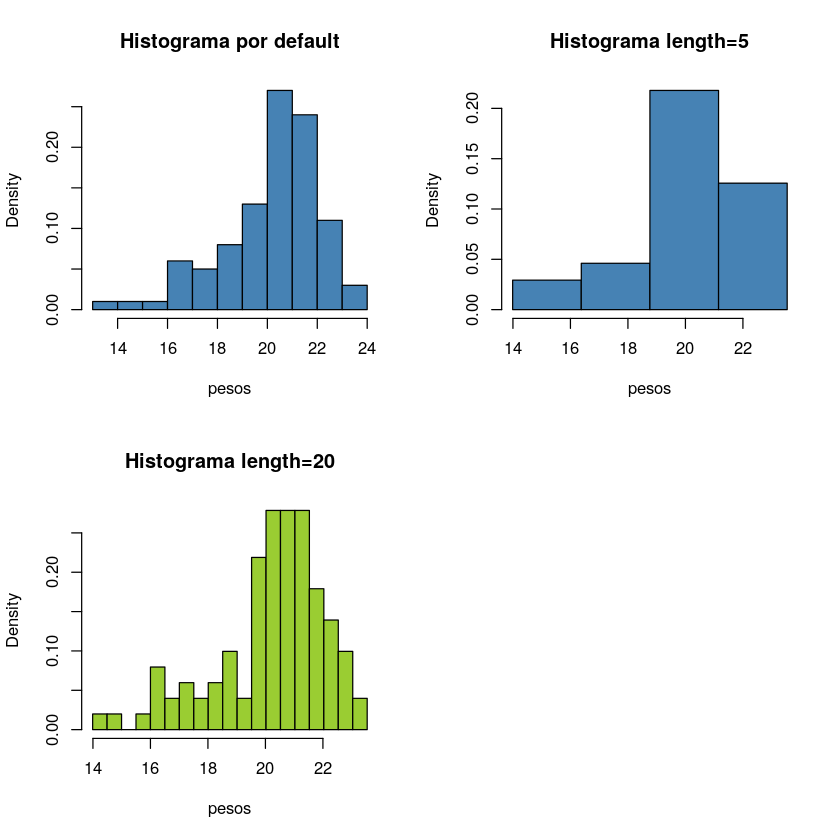

In [4]:
par(mfrow=c(2,2))
hist(pesos, col="steelblue", prob=T, main="Histograma por default")
hist(pesos, breaks=seq(min(pesos), max(pesos), length=5), col="steelblue", prob=T, main="Histograma length=5")
hist(pesos, breaks=seq(min(pesos), max(pesos), length=20), col="yellowgreen", prob=T, main="Histograma length=20")

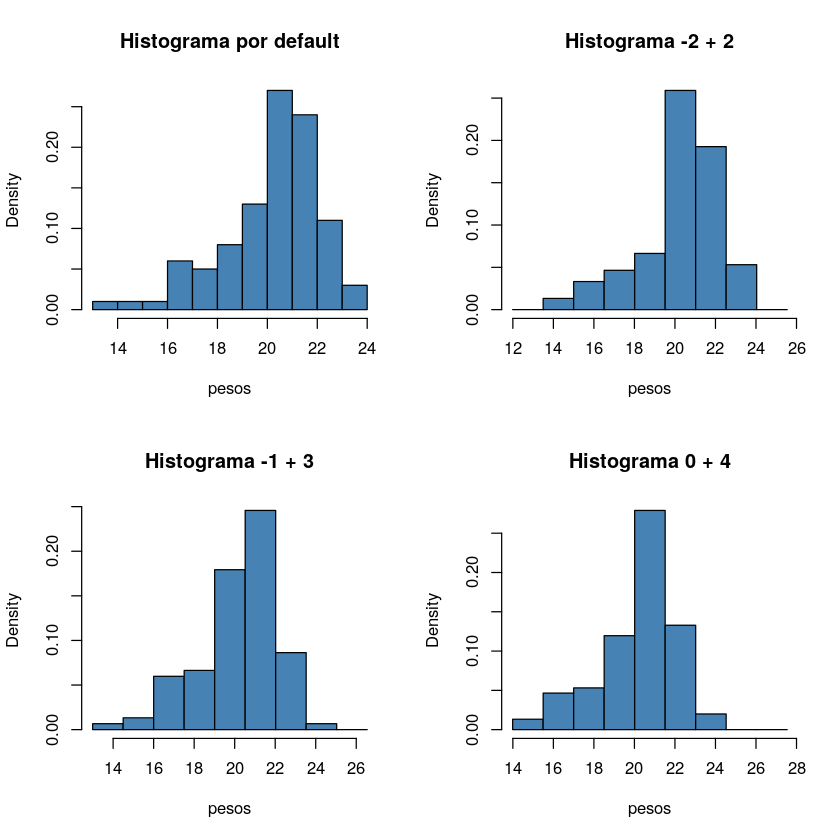

In [5]:
par(mfrow=c(2,2))
hist(pesos, col="steelblue", prob=T, main="Histograma por default")
hist(pesos, breaks=seq(min(pesos)-2, max(pesos)+2, length=10), col="steelblue", prob=T, main="Histograma -2 + 2")
hist(pesos, breaks=seq(min(pesos)-1, max(pesos)+3, length=10), col="steelblue", prob=T, main="Histograma -1 + 3")
hist(pesos, breaks=seq(min(pesos), max(pesos)+4, length=10), col="steelblue", prob=T, main="Histograma 0 + 4")

# 4.

Implemente una funci ́on densidad.est.parzen que tenga por argumento un conjunto
de datos x = (x1, . . . , xn), una ventana h y un punto z y devuelva fbh(z), el valor de
la estimaci ́on de la densidad f en el punto z, utilizando el n ́ucleo uniforme (tambi ́en
llamado rectangular): densidad.est.parzen(x,h,z)

## Estimador de Parzen

> $$\large \hat f_h(z) = \frac 1 {n h} \sum_{i=1}^n \mathbf K \left( \frac {z - X_i}{h} \right)$$

donde

> $ \large \mathbf K \left( t \right) = \frac 1 2 \mathbf 1\{ t \in [-1,1] \}$

Es el kernel uniforme $[-1,1]$ (aka núcleo rectangular)

In [6]:
densidad.est.parzen <- function(X, h, z){
    n <- length(X)
    t <- (z - X) / h
    Kt <- 0.5 * (t > -1 & t < 1)
    
    fhz <- 1 / (n*h) * sum(Kt) 
    
    return(fhz)
}

# 5.

5. Con la funci ́on densidad.est.parzen implementada, estime la densidad f en el inter-
valo (min(datos),max(datos)) obtener una estimaci ́on de la densidad f en el punto

z = 20 para h = 1.

In [9]:
h <- 1
z <- 20
densidad.est.parzen(pesos, h, z)

[1] 0.2

# 6.

6. Repita con h = 0,5 y h = 2. ¿Observa alguna diferencia en las estimaciones?

In [10]:
h <- 0.5
z <- 20
densidad.est.parzen(pesos, h, z)

[1] 0.24

In [11]:
h <- 2
z <- 20
densidad.est.parzen(pesos, h, z)

[1] 0.18

# 7.

7. Con la funci ́on densidad.est.parzen implementada, estime la densidad f en el inter-
valo (min(datos),max(datos)) sobre una grilla de 200 puntos equiespaciados para

h = 1. Grafique el estimador fbh(z) obtenido. Repetir con h = 0,5 y h = 2. Comparar.

In [15]:
Ngrilla <- 200
grilla.z <- seq(min(pesos), max(pesos), length=Ngrilla)

In [20]:
h.1  <- 1
h.05 <- 0.5
h.2  <- 2
f_hat.1  <- rep(NA, Ngrilla)
f_hat.05 <- rep(NA, Ngrilla)
f_hat.2  <- rep(NA, Ngrilla)
for(i in 1:Ngrilla){
    f_hat.1[i]   <- densidad.est.parzen(pesos, h.1, grilla.z[i])
    f_hat.05[i] <- densidad.est.parzen(pesos, h.05, grilla.z[i])
    f_hat.2[i]   <- densidad.est.parzen(pesos, h.2, grilla.z[i])
}

In [61]:
#?plotmath

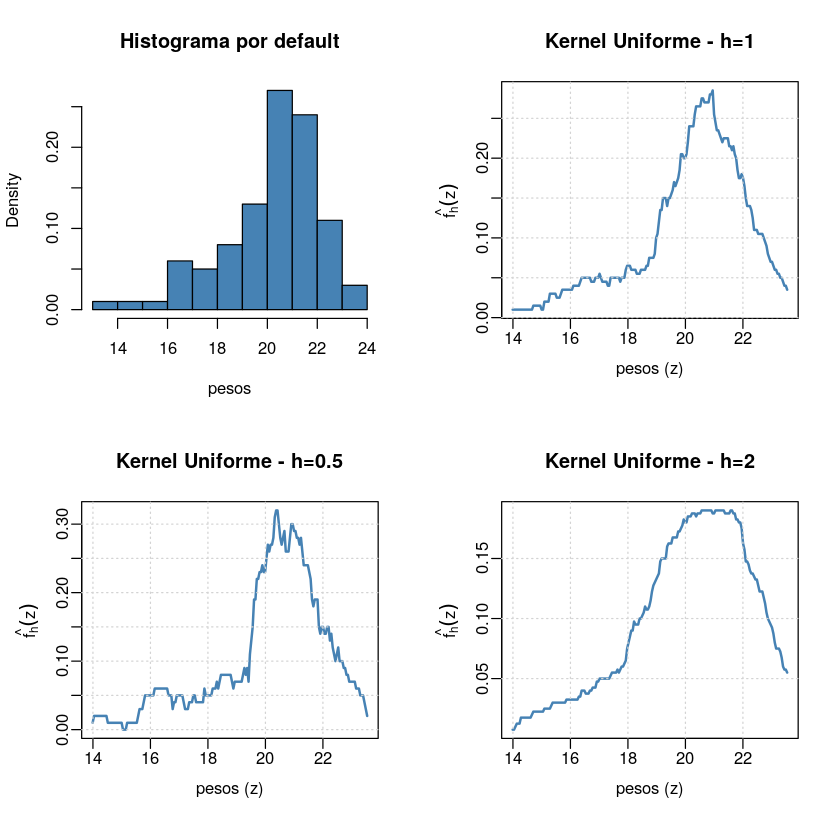

In [60]:
par(mfrow=c(2,2))
hist(pesos, col="steelblue", prob=T, main="Histograma por default")
plot(grilla.z, f_hat.1, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=1", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.05, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=0.5", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.2, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=2", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()